In [1]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
import warnings
import requests
warnings.filterwarnings("ignore")
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv", index_col=False) #reading csv raw data
df.head()  # printing the first rows

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


* There are no null values in the dataset

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [9]:
df.skew()


W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

<AxesSubplot:>

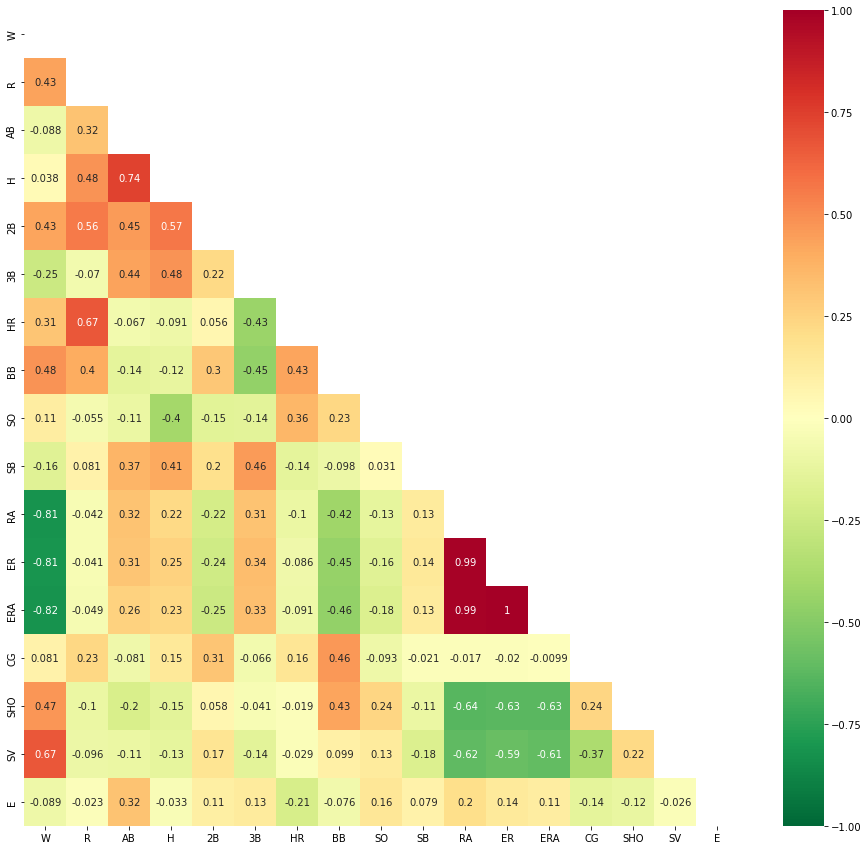

In [10]:
plt.figure(figsize=(16, 15))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn_r', vmax=1,vmin=-1, center=0,mask=np.triu(np.ones_like(df.corr())))

In [11]:
print(df.corr())

            W         R        AB         H        2B        3B        HR  \
W    1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R    0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB  -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H    0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B   0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   
3B  -0.251118 -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915   
HR   0.307407  0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000   
BB   0.484342  0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691   
SO   0.111850 -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923   
SB  -0.157234  0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567   
RA  -0.812952 -0.041623  0.316010  0.224324 -0.218160  0.314125 -0.103903   
ER  -0.809435 -0.041245  0.309686  0.252489 -0.235531  0.340225 -0.085922   

##### Visualization

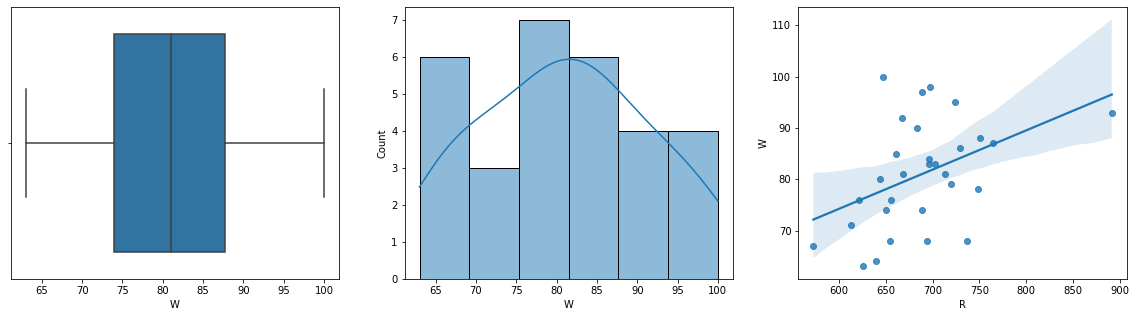

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['W'])
plt.subplot(1,3,2)
sns.histplot(x='W',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='R',y='W',data=df)
plt.show()

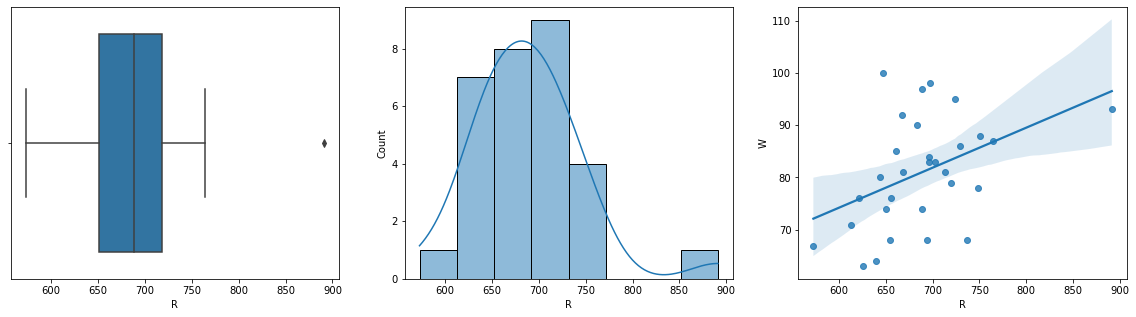

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['R'])
plt.subplot(1,3,2)
sns.histplot(x='R',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='R',y='W',data=df)
plt.show()

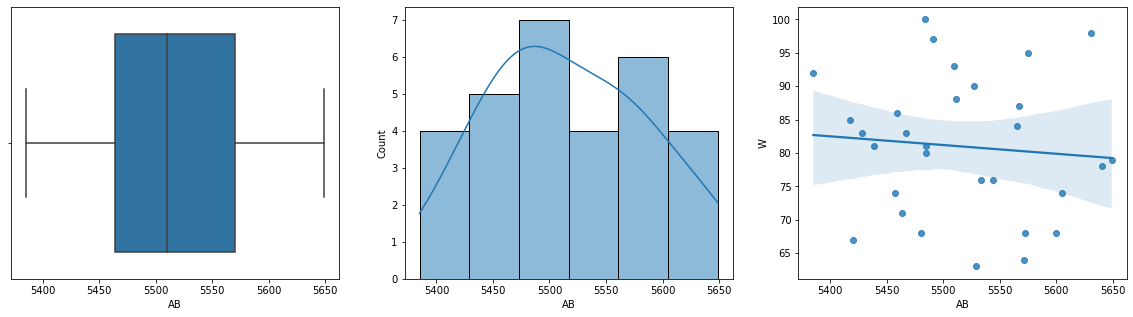

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['AB'])
plt.subplot(1,3,2)
sns.histplot(x='AB',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='AB',y='W',data=df)
plt.show()

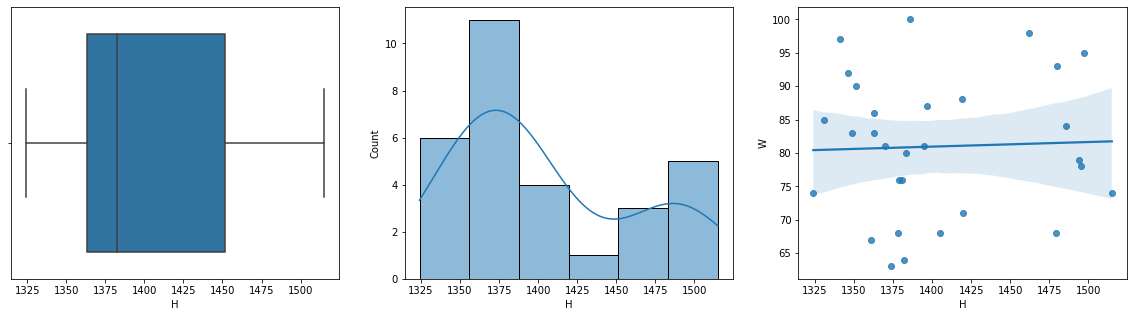

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['H'])
plt.subplot(1,3,2)
sns.histplot(x='H',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='H',y='W',data=df)
plt.show()

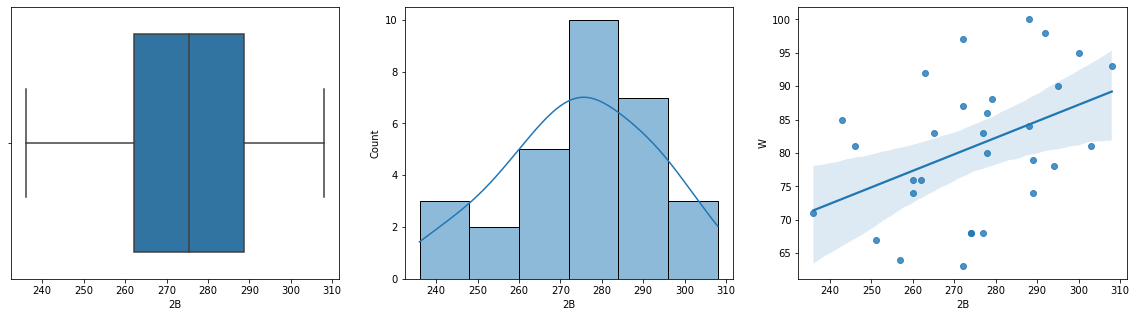

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['2B'])
plt.subplot(1,3,2)
sns.histplot(x='2B',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='2B',y='W',data=df)
plt.show()

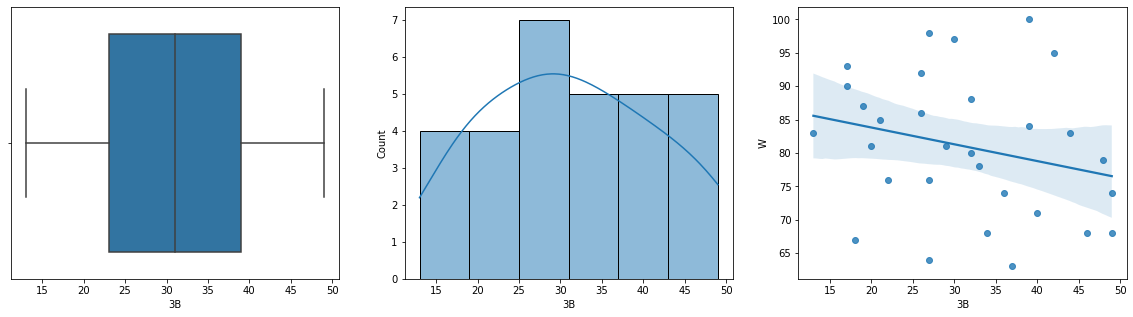

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['3B'])
plt.subplot(1,3,2)
sns.histplot(x='3B',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='3B',y='W',data=df)
plt.show()

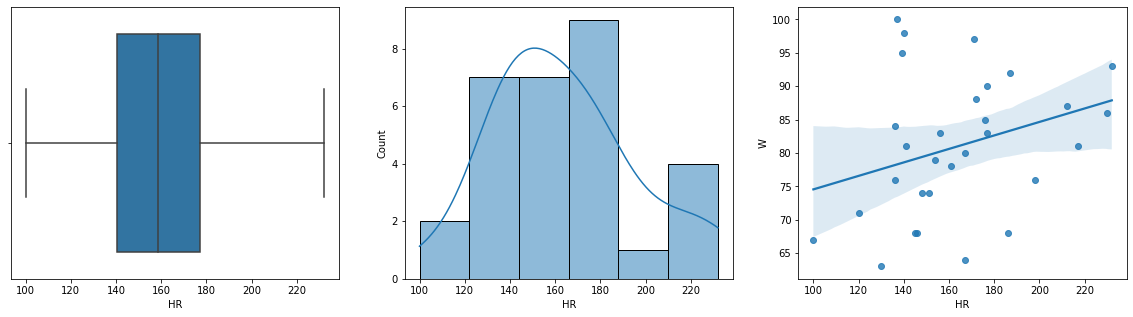

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['HR'])
plt.subplot(1,3,2)
sns.histplot(x='HR',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='HR',y='W',data=df)
plt.show()

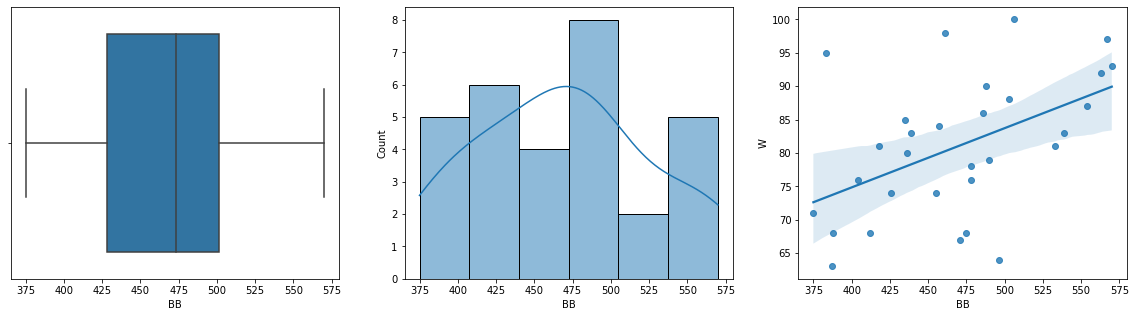

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['BB'])
plt.subplot(1,3,2)
sns.histplot(x='BB',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='BB',y='W',data=df)
plt.show()

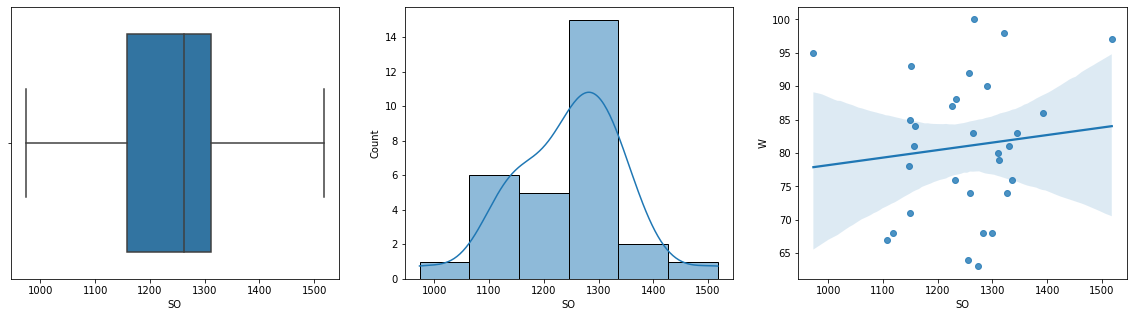

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['SO'])
plt.subplot(1,3,2)
sns.histplot(x='SO',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='SO',y='W',data=df)
plt.show()

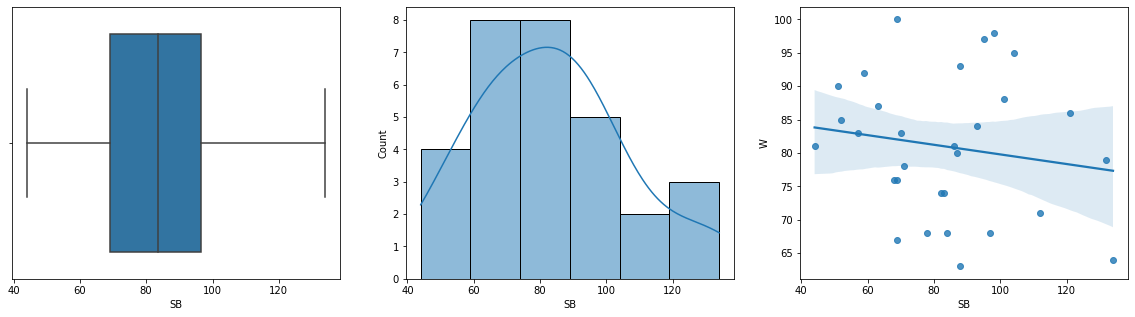

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['SB'])
plt.subplot(1,3,2)
sns.histplot(x='SB',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='SB',y='W',data=df)
plt.show()

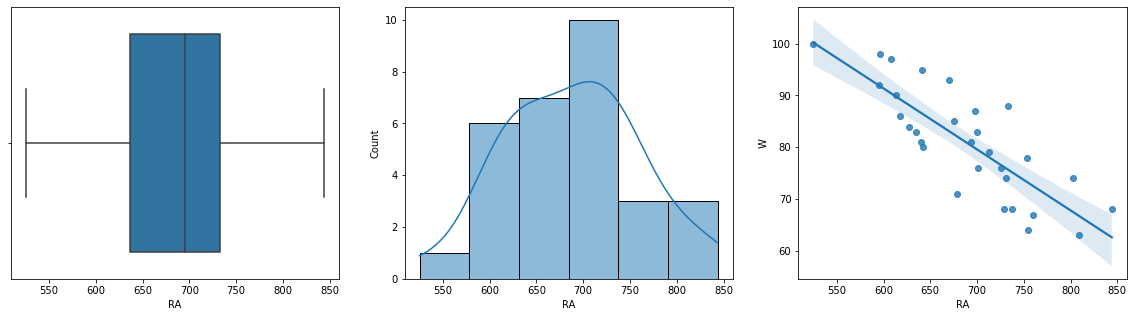

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['RA'])
plt.subplot(1,3,2)
sns.histplot(x='RA',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='RA',y='W',data=df)
plt.show()

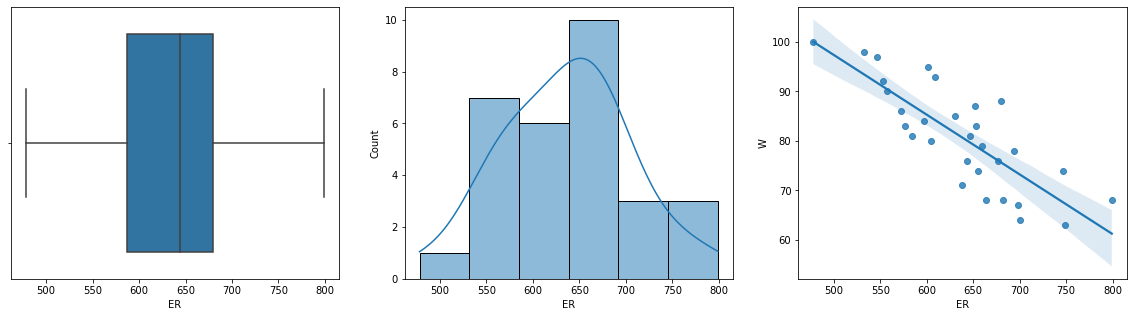

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['ER'])
plt.subplot(1,3,2)
sns.histplot(x='ER',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='ER',y='W',data=df)
plt.show()

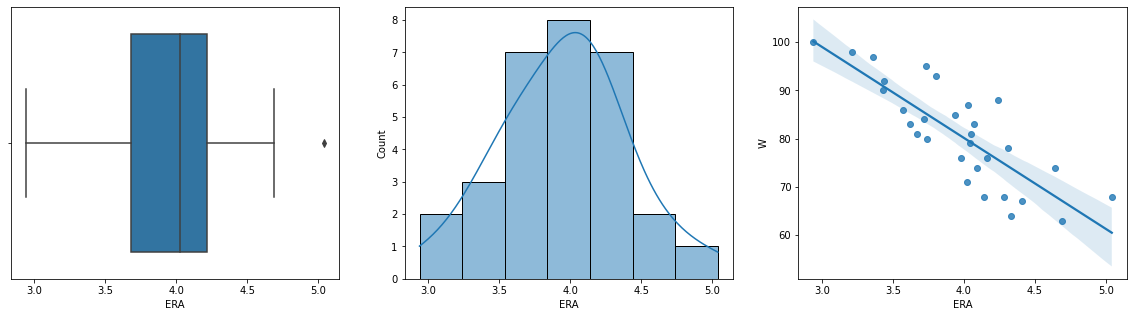

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['ERA'])
plt.subplot(1,3,2)
sns.histplot(x='ERA',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='ERA',y='W',data=df)
plt.show()

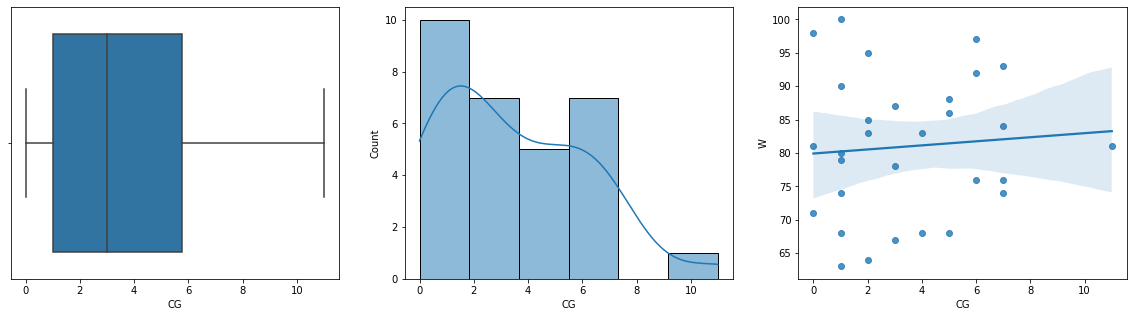

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['CG'])
plt.subplot(1,3,2)
sns.histplot(x='CG',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='CG',y='W',data=df)
plt.show()

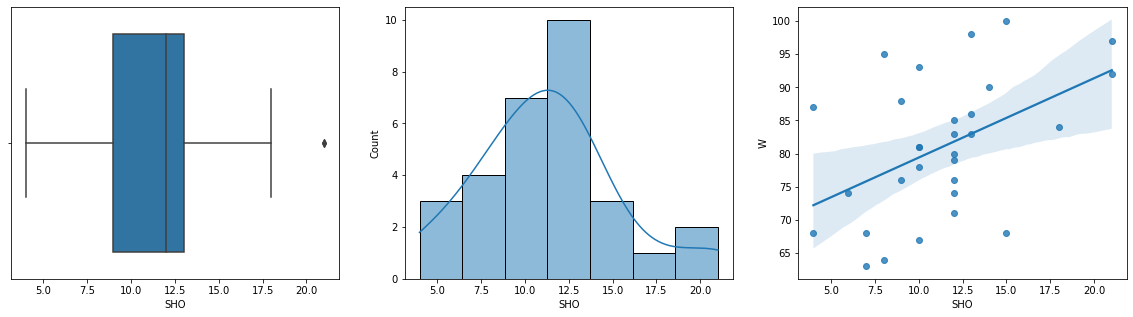

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['SHO'])
plt.subplot(1,3,2)
sns.histplot(x='SHO',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='SHO',y='W',data=df)
plt.show()

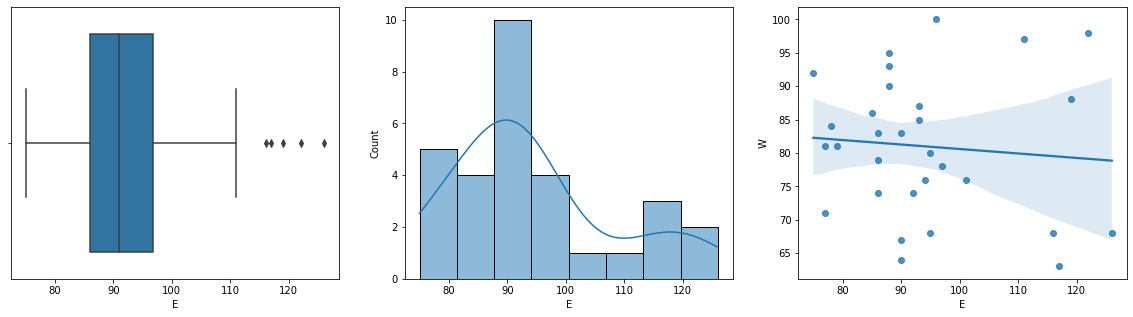

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['E'])
plt.subplot(1,3,2)
sns.histplot(x='E',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='E',y='W',data=df)
plt.show()

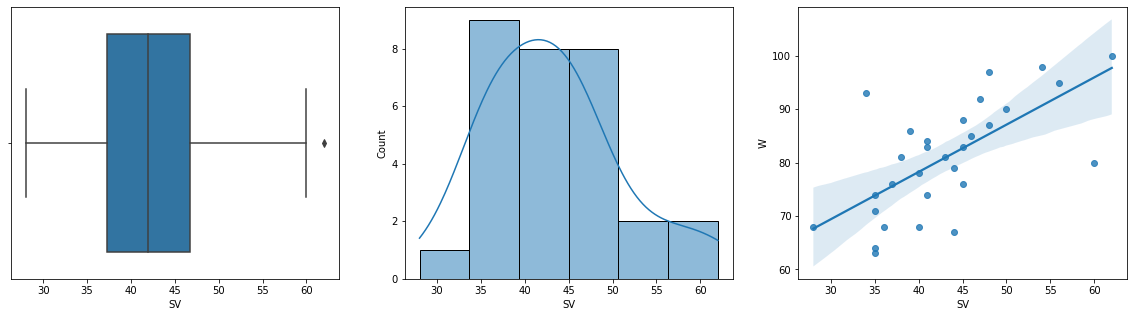

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['SV'])
plt.subplot(1,3,2)
sns.histplot(x='SV',data=df,kde=True)
plt.subplot(1,3,3)
sns.regplot(x='SV',y='W',data=df)
plt.show()

* Dropping the outliers

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df))


In [30]:
threshold=3
print(np.where (z>3))


(array([5], dtype=int64), array([1], dtype=int64))


In [31]:

df_new=df[(z<3).all(axis=1)]
df_new.shape,df.shape

((29, 17), (30, 17))

In [32]:
l=(30-29)*100/30
l

3.3333333333333335

In [33]:
df=df_new
df.shape

(29, 17)

In [34]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

'Earned Runs','Earned Run Average' shows multicollearnity so it would be better to drop 

In [35]:
df.drop(['ER','ERA'],axis=1,inplace=True)

In [40]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,5,9,45,119


###### Splitting the  data set 


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [42]:
X=df.drop('W',axis=1)
Y=df['W']

In [43]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, test_size=0.20, random_state=15)

In [44]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(23, 14)
(23,)
(6, 14)
(6,)


##### LinearRegression
##### Model Training

In [45]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [46]:
X_train_prediction = model.predict(X_train)

In [47]:
print(X_train_prediction)


[81.55667456 80.55841868 69.97247728 81.09582954 74.75452357 88.97878129
 67.89590135 87.38379148 69.30323231 86.06571796 84.72869218 88.5255544
 71.19269547 70.30592324 93.48794582 81.99565735 86.44103775 93.29094946
 60.23350433 87.11113289 76.90906881 71.00346106 79.2090292 ]


In [48]:
# R square value
r2_train=metrics.r2_score(Y_train, X_train_prediction)

In [49]:
print('R squared value=',r2_train )

R squared value= 0.9083462083471038


In [50]:
# Predtion on testing data
X_test_prediction = model.predict(X_test)

In [51]:
# R square value
r2_test=metrics.r2_score(Y_test, X_test_prediction)

In [52]:
print('R squared value=',r2_test )

R squared value= 0.9406505507828443


In [53]:
print(f"Linear coefficients : {model.coef_}")

Linear coefficients : [ 0.15216213  0.00439177 -0.01018246 -0.12969431 -0.08002294 -0.09849636
 -0.02071474  0.00586525  0.00825618 -0.06154648  0.94683983  0.29524582
  0.67815972  0.00547472]


In [54]:
#intercept value

model.intercept_

27.950018957456493

##### RandomForestRegressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(random_state = 0)
model4.fit(X_train, Y_train)
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test) 
print(y_pred_train)
print('\n')
print(y_pred_test)
print("Model Evaluation for RF Regressor :")
root_mean_error_train = np.sqrt( metrics.mean_squared_error(Y_train, y_pred_train))
root_mean_error_test = np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test))

print('Root mean sqd error for training set is {}'.format(root_mean_error_train),' and Root mean sqd error for test set is {}'.format(root_mean_error_test))
### R-squared
from sklearn.metrics import r2_score
print('R-squared:',r2_score(Y_train, y_pred_train))
print('R-squared:',r2_score(Y_test, y_pred_test))


[81.52 81.32 71.64 80.56 75.33 83.2  71.96 83.16 73.61 82.76 83.87 90.18
 71.6  71.   92.12 83.02 82.51 90.82 65.3  85.73 77.17 73.67 77.66]


[88.09 85.59 81.74 73.67 85.89 74.  ]
Model Evaluation for RF Regressor :
Root mean sqd error for training set is 2.7398405221757924  and Root mean sqd error for test set is 8.281956290635684
R-squared: 0.9111500850225982
R-squared: 0.5826117647058826


##### DecisionTreeRegressor

In [56]:
from sklearn.tree import DecisionTreeRegressor


In [57]:
model5 = DecisionTreeRegressor()
model5.fit(X_train, Y_train)
y_pred_train1 = model5.predict(X_train)
y_pred_test1 = model5.predict(X_test) 
print(y_pred_train1)
print('\n')
print(y_pred_test1)
print("Model Evaluation for DT Regressor :")
root_mean_error_train1 = np.sqrt( metrics.mean_squared_error(Y_train, y_pred_train1))
root_mean_error_test1 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test1))

print('Root mean sqd error for training set is {}'.format(root_mean_error_train1),' and Root mean sqd error for test set is {}'.format(root_mean_error_test1))
### R-squared
from sklearn.metrics import r2_score
print('R-squared:',r2_score(Y_train, y_pred_train1))
print('R-squared:',r2_score(Y_test, y_pred_test1))


[83. 81. 68. 81. 76. 84. 67. 88. 74. 83. 86. 92. 68. 68. 98. 85. 80. 95.
 63. 87. 76. 71. 78.]


[92. 81. 78. 67. 83. 76.]
Model Evaluation for DT Regressor :
Root mean sqd error for training set is 0.0  and Root mean sqd error for test set is 10.238815035605112
R-squared: 1.0
R-squared: 0.3620689655172413


##### XGBRegressor

In [58]:
from xgboost import XGBRegressor

model6= XGBRegressor()

In [59]:
model6 = XGBRegressor()
model6.fit(X_train, Y_train)
y_pred_train2 = model6.predict(X_train)
y_pred_test2 = model6.predict(X_test) 
print(y_pred_train2)
print('\n')
print(y_pred_test2)
print("Model Evaluation for XGB Regressor :")
root_mean_error_train2 = np.sqrt( metrics.mean_squared_error(Y_train, y_pred_train2))
root_mean_error_test2 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test2))

print('Root mean sqd error for training set is {}'.format(root_mean_error_train2),' and Root mean sqd error for test set is {}'.format(root_mean_error_test2))
### R-squared
from sklearn.metrics import r2_score
print('R-squared:',r2_score(Y_train, y_pred_train2))
print('R-squared:',r2_score(Y_test, y_pred_test2))


[83.000175 81.00037  68.00003  81.00049  75.99936  84.000046 66.99989
 87.999725 73.999725 82.99965  85.99983  92.00018  68.000336 67.99969
 97.99837  84.999535 80.0002   94.99973  63.000793 87.00005  76.000984
 71.00032  78.00037 ]


[88.2323   85.28659  87.853485 73.02319  89.59477  72.884384]
Model Evaluation for XGB Regressor :
Root mean sqd error for training set is 0.0005194277256493443  and Root mean sqd error for test set is 8.677478748887912
R-squared: 0.9999999968065751
R-squared: 0.5417932813139879


##### Hyper Parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Root Mean Squared Error: 7.581991822733655
Mean_absolute_error for test set is 6.0566666666666675
Mean_squared_error for test set is 57.48660000000002


<AxesSubplot:xlabel='W', ylabel='Density'>

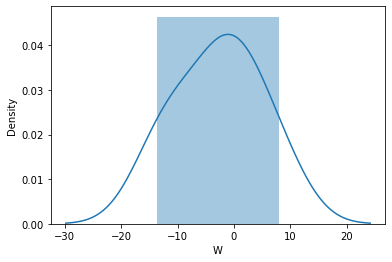

In [61]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)
GF_grid.fit(X_train,Y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(X_test)

GF_grid.best_params_
{'criterion': 'mse', 'n_estimators': 100}
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, GF_grid_pred)))
r2_sco=r2_score(Y_test, GF_grid_pred)

ab_test = metrics.mean_absolute_error(Y_test, GF_grid_pred)
print('Mean_absolute_error for test set is {}'.format(ab_test))

sq_test = metrics.mean_squared_error(Y_test, GF_grid_pred)
print('Mean_squared_error for test set is {}'.format(sq_test))
sns.distplot(GF_grid_pred-Y_test)

In [62]:
print(r2_sco)

0.6501829614604462


Hyper parameteer tuning with the model and have r2 value of 0.6501829614604462

In [63]:
0.6501829614604462import joblib
base_file="Baseball_casestudy"
joblib.dump(GF_grid, base_file)

['Baseball_casestudy']